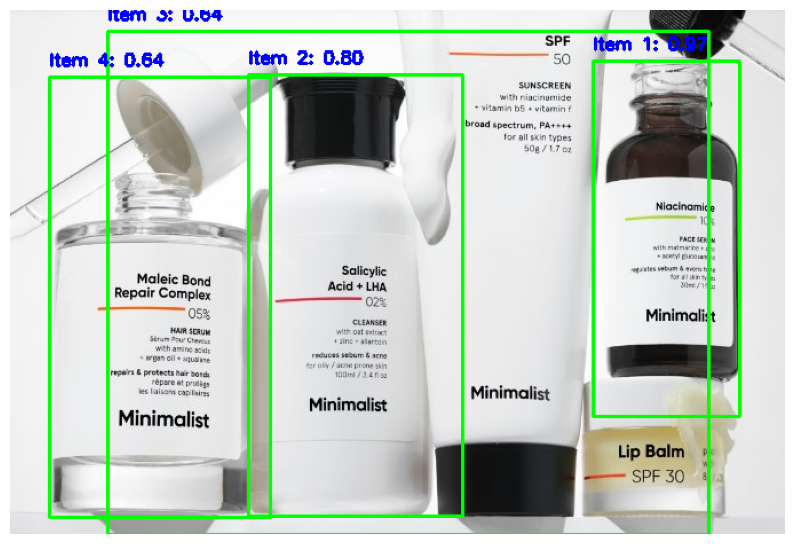

Total Items Detected: 4


In [3]:
import torch
import torchvision
from PIL import Image
import cv2
import matplotlib.pyplot as plt

# Load pre-trained Faster R-CNN model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights="FasterRCNN_ResNet50_FPN_Weights.DEFAULT")
model.eval()  # Set the model to evaluation mode

# Load your image
image_path = 'C:\\Users\\DELL\\Documents\\smart_vision_project\\IR_basedcount\\image2.jpg'
img = Image.open(image_path).convert("RGB")
img_tensor = torchvision.transforms.functional.to_tensor(img)

# Perform inference
with torch.no_grad():
    predictions = model([img_tensor])

# Parse and display results
boxes = predictions[0]['boxes'].numpy()
scores = predictions[0]['scores'].numpy()

# Draw boxes on the original image
image = cv2.imread(image_path)
for i, box in enumerate(boxes):
    if scores[i] > 0.5:  # Set confidence threshold
        x1, y1, x2, y2 = box.astype(int)
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image, f'Item {i+1}: {scores[i]:.2f}', (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# Convert image to RGB format (Matplotlib uses RGB, while OpenCV uses BGR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')  # Hide axes
plt.show()

# Count detected objects
total_items = len([score for score in scores if score > 0.5])
print(f"Total Items Detected: {total_items}")
